In [1]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models, layers, optimizers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_data, train_lables), (test_data, test_lables)= imdb.load_data(num_words=10000)


NameError: name 'imdb' is not defined

In [4]:
print('words:', train_data[0])
print('words:', train_lables[0])
print('label:', train_data[0])

words: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
words: 1
label: [1, 14, 22, 16, 43, 530, 973, 1622, 1

In [5]:
word_index=imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

# preparing data set

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results

In [7]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [8]:
x_train.shape
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [9]:

print(x_test[0])
x_test.shape

[0. 1. 1. ... 0. 0. 0.]


(25000, 10000)

In [10]:
y_train=np.asarray(train_lables).astype('float32')
y_test=np.asarray(test_lables).astype('float32')
y_train[0]

1.0

# Building Model

In [11]:
model=models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# cross validation and introducing validation data as well 

In [12]:
x_validation=x_train[:10000]
partial_x_train=x_train[10000:]
y_validation=y_train[:10000]
partial_y_train=y_train[10000:]

In [13]:
x_validation.shape


(10000, 10000)

In [14]:
partial_x_train.shape

(15000, 10000)

# compilation step

In [15]:
model.compile(optimizer='rmsprop', loss= 'binary_crossentropy', metrics=['acc'])
history=model.fit(partial_x_train,partial_y_train, epochs=20, batch_size=512, validation_data=(x_validation,y_validation))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 362us/sample - loss: 0.5069 - acc: 0.7869 - val_loss: 0.3989 - val_acc: 0.8544
Epoch 2/20
15000/15000 [==============================] - 2s 150us/sample - loss: 0.3074 - acc: 0.9026 - val_loss: 0.3194 - val_acc: 0.8781
Epoch 3/20
15000/15000 [==============================] - 2s 121us/sample - loss: 0.2280 - acc: 0.9259 - val_loss: 0.2828 - val_acc: 0.8897
Epoch 4/20
15000/15000 [==============================] - 2s 119us/sample - loss: 0.1793 - acc: 0.9429 - val_loss: 0.2770 - val_acc: 0.8893
Epoch 5/20
15000/15000 [==============================] - 2s 124us/sample - loss: 0.1456 - acc: 0.9550 - val_loss: 0.2784 - val_acc: 0.8889
Epoch 6/20
15000/15000 [==============================] - 2s 142us/sample - loss: 0.1211 - acc: 0.9612 - val_loss: 0.2951 - val_acc: 0.8856
Epoch 7/20
15000/15000 [==============================] - 2s 121us/sample - loss: 0.1026 - acc: 0.9687 - val_l

# plot loss

In [16]:
history_dict=history.history
print(history_dict)

{'loss': [0.506939794476827, 0.3074083408355713, 0.22798160599072775, 0.17933976804415386, 0.14559770567417143, 0.12112476198673248, 0.1025846441268921, 0.08319061865011851, 0.07183831471204757, 0.057953604876995087, 0.04741038819154104, 0.03945839143594106, 0.03225664017498493, 0.024535571254293124, 0.021875542395313582, 0.01443872924844424, 0.011581206152339776, 0.010893755122025808, 0.00855681222776572, 0.004272815449660023], 'acc': [0.78686666, 0.9026, 0.92593336, 0.9428667, 0.955, 0.9612, 0.9687333, 0.977, 0.9798667, 0.9844667, 0.9886, 0.9908, 0.99266666, 0.99586666, 0.99586666, 0.99826664, 0.9993333, 0.9984667, 0.9989333, 0.99986666], 'val_loss': [0.3988976393222809, 0.31938427243232725, 0.28284353275299073, 0.27697772450447083, 0.2784439181804657, 0.29509878492355346, 0.3209162548542023, 0.3307869403362274, 0.3443339435577393, 0.37109173798561096, 0.4044459397315979, 0.45131057624816895, 0.45393520517349245, 0.5083220902442932, 0.516892297077179, 0.629451549243927, 0.60056385879

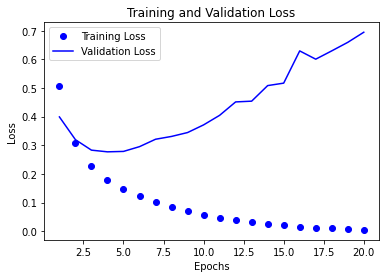

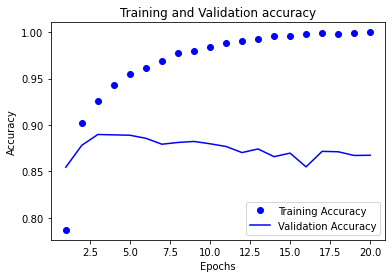

<Figure size 432x288 with 0 Axes>

In [17]:
history_dict=history.history

loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()

acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.clf()

In [18]:
model.predict(x_test)

array([[0.00788   ],
       [0.99999964],
       [0.9701961 ],
       ...,
       [0.00267845],
       [0.02247202],
       [0.7300451 ]], dtype=float32)